In [95]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [96]:
#Prepare dummy data
n_pts=500
centers=[[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X,Y=datasets.make_blobs(n_samples=n_pts,random_state=123, centers=centers,cluster_std=0.4)

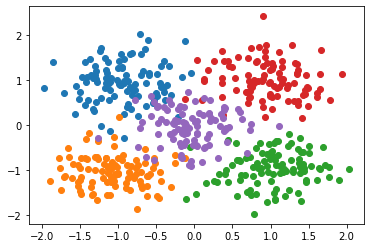

In [97]:
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])

In [98]:
#HOT encode the labels
Y_cat=to_categorical(Y,5)
print(Y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [99]:
#Create the deep Neural Network
model=Sequential()
model.add(Dense(units=5, input_shape=(2,),activation='softmax'))
model.compile(Adam(0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
model.fit(x=X,y=Y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 997us/step - loss: 1.6581 - accuracy: 0.3420
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7523 - accuracy: 0.8220
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.9040
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.9340
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.9460
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.9440
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9480
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.9520
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9520
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9460
Epoch 1

10/10 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.9480
Epoch 83/100
10/10 [==============================] - 0s 997us/step - loss: 0.1523 - accuracy: 0.9520
Epoch 84/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9500
Epoch 85/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1526 - accuracy: 0.9480
Epoch 86/100
10/10 [==============================] - 0s 997us/step - loss: 0.1517 - accuracy: 0.9520
Epoch 87/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9520
Epoch 88/100
10/10 [==============================] - 0s 942us/step - loss: 0.1512 - accuracy: 0.9520
Epoch 89/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9500
Epoch 90/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9460
Epoch 91/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9540
Epoch 9

In [101]:
def plot_decision_boundary(X,Y, model):
    x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
    y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
    xx,yy=np.meshgrid(x_span,y_span)
    
    xx_,yy_=xx.ravel(),yy.ravel()
    
    grid=np.c_[xx_,yy_]
    
    pred_func=model.predict(grid)
    pred_class=np.argmax(pred_func,axis=1)
    z=pred_class.reshape(xx.shape)
    plt.contourf(xx,yy,z)

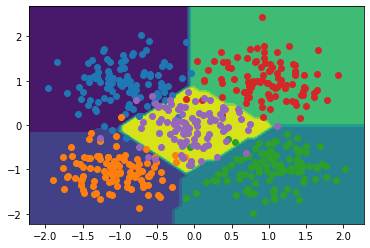

In [102]:
plot_decision_boundary(X,Y_cat,model)
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])

Prediction is :  [1]


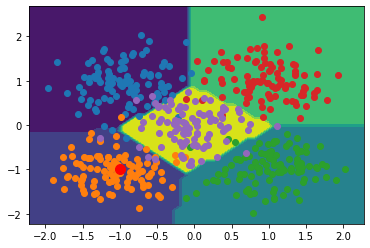

In [103]:
#Make predictions on new data
x=-1
y=-1

point=np.array([[x,y]])

prediction=model.predict(point)
pred_class=np.argmax(prediction,axis=1)
plot_decision_boundary(X,Y_cat,model)
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])
plt.plot([x],[y],marker='o',markersize=10,color='red')
print("Prediction is : ",pred_class)